Can we just feed a neural net datasets and let it go to town with predictions?

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')
#drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import os, glob
import numpy as np
import statistics
import time

import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.layers import Input, Dense, Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.optimizers import SGD
from tensorflow.python.keras.optimizers import Adam, Nadam
from tensorflow.keras import layers

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
!ls "/content/drive/My Drive/NBA Predictions" #for Google collab

'Bad NBA Playoffs Predictions.ipynb'
 DataScraping.ipynb
'Fake Data'
 FakeData2.gsheet
 Model
'NBA Playoff Predictions Report.gdoc'
'NBA Playoffs Data'
'NBA Team Data'
'NBA Year Data'
'NBA Year Data Less'
'Playoffs vs Non-playoffs Data Analysis.ipynb'
'Playoffs vs Non-playoffs Individual Player Data Analysis .ipynb'


In [0]:
teams = ["ATL", "BRK", "BOS", "CHA", "CHI","CLE","DAL","DEN","DET","GSW","HOU","IND","LAC","LAL","MEM","MIA","MIL","MIN","NOP","NYK","OKC","ORL","PHI","PHO","POR","SAC","SAS","TOR","UTA","WAS"]

In [0]:
team_abr = {}
team_abr["ATL"] = 'Atlanta Hawks'
team_abr["BRK"] = 'Brooklyn Nets'
team_abr["NJN"] = 'New Jersey Nets'
team_abr["BOS"] = 'Boston Celtics'
team_abr["CHA"] = 'Charlotte Bobcats'
team_abr["CHH"] = 'Charlotte Hornets'
team_abr["CHO"] = 'Charlotte Hornets'
team_abr["CHI"] = 'Chicago Bulls'
team_abr["CLE"] = 'Cleveland Cavaliers'
team_abr["DAL"] = 'Dallas Mavericks'
team_abr["DEN"] = 'Denver Nuggets'
team_abr["DET"] = 'Detroit Pistons'
team_abr["GSW"] = 'Golden State Warriors'
team_abr["HOU"] = 'Houston Rockets'
team_abr["IND"] = 'Indiana Pacers'
team_abr["LAC"] = 'Los Angeles Clippers'
team_abr["SDC"] = 'San Diego Clippers'
team_abr["LAL"] = 'Los Angeles Lakers'
team_abr["MEM"] = 'Memphis Grizzlies'
team_abr["VAN"] = 'Vancouver Grizzlies'
team_abr["MIA"] = 'Miami Heat'
team_abr["MIL"] = 'Milwaukee Bucks'
team_abr["MIN"] = 'Minnesota Timberwolves'
team_abr["NOP"] = 'New Orleans Pelicans'
team_abr["NOH"] = 'New Orleans Hornets'
team_abr["NOK"] = 'New Orleans/Oklahoma City Hornets'
team_abr["NYK"] = 'New York Knicks'
team_abr["OKC"] = 'Oklahoma City Thunder'
team_abr["SEA"] = 'Seattle Supersonics'
team_abr["ORL"] = 'Orlando Magic'
team_abr["PHI"] = 'Philadelphia 76ers'
team_abr["PHO"] = 'Phoenix Suns'
team_abr["POR"] = 'Portland Trail Blazers'
team_abr["SAC"] = 'Sacramento Kings'
team_abr["KCK"] = 'Kansas City Kings'
team_abr["SAS"] = 'San Antonio Spurs'
team_abr["TOR"] = 'Toronto Raptors'
team_abr["UTA"] = 'Utah Jazz'
team_abr["WAS"] = 'Washington Wizards'
team_abr["WSB"] = 'Washington Bullets'

In [0]:
def get_playoff_teams_by_year(year):
  for file in os.listdir("/content/drive/My Drive/NBA Predictions/NBA Playoffs Data/Playoff Teams By Year"):
    if file.find(str(year)) != -1:
      playoffTeams = pd.read_csv("/content/drive/My Drive/NBA Predictions/NBA Playoffs Data/Playoff Teams By Year/" + file, header=None, usecols=[1])
      playoffTeams = list(playoffTeams.iloc[:,0])
      break
  return playoffTeams

In [0]:
#get list of playoff_teams
playoff_teams = {}
for year in range(1981,2020):
  playoff_teams[year] = get_playoff_teams_by_year(year)

In [0]:
# # faster to manually go through and edit playoff teams
# for i in range(len(playoff_teams[1981])):
#   if playoff_teams[1981][i] == 'Kansas City Kings':
#     playoff_teams[1981][i] = 'Sacramento Kings'

# for i in range(len(playoff_teams[1982])):
#   if playoff_teams[1982][i] == 'Seattle Supersonics':
#     playoff_teams[1982][i] = 'Oklahoma City Thunder'
#   elif playoff_teams[1982][i] == 'New Jersey Nets':
#     playoff_teams[1982][i] = 'Brooklyn Nets'
#   elif playoff_teams[1982][i] == 'Washington Bullets':
#     playoff_teams[1982][i] = 'Washington Wizards'

# for i in range(len(playoff_teams[1983])):
#   if playoff_teams[1983][i] == 'Seattle Supersonics':
#     playoff_teams[1983][i] = 'Oklahoma City Thunder'
#   elif playoff_teams[1983][i] == 'New Jersey Nets':
#     playoff_teams[1983][i] = 'Brooklyn Nets'

# for i in range(len(playoff_teams[1984])):
#   if playoff_teams[1984][i] == 'Kansas City Kings':
#     playoff_teams[1984][i] = 'Sacramento Kings'
#   elif playoff_teams[1984][i] == 'Washington Bullets':
#     playoff_teams[1984][i] = 'Washington Wizards'
#   elif playoff_teams[1984][i] == 'Seattle Supersonics':
#     playoff_teams[1984][i] = 'Oklahoma City Thunder'
#   elif playoff_teams[1984][i] == 'New Jersey Nets':
#     playoff_teams[1984][i] = 'Brooklyn Nets'

# for i in range(len(playoff_teams[1985])):
#   if playoff_teams[1985][i] == 'New Jersey Nets':
#     playoff_teams[1985][i] = 'Brooklyn Nets'
#   elif playoff_teams[1985][i] == 'Washington Bullets':
#     playoff_teams[1985][i] = 'Washington Wizards'

# for i in range(len(playoff_teams[1986])):
#   if playoff_teams[1986][i] == 'New Jersey Nets':
#     playoff_teams[1986][i] = 'Brooklyn Nets'
#   elif playoff_teams[1986][i] == 'Washington Bullets':
#     playoff_teams[1986][i] = 'Washington Wizards'

# for i in range(len(playoff_teams[1987])):
#   if playoff_teams[1987][i] == 'Seattle Supersonics':
#     playoff_teams[1987][i] = 'Oklahoma City Thunder'
#   elif playoff_teams[1987][i] == 'Washington Bullets':
#     playoff_teams[1987][i] = 'Washington Wizards'

# for i in range(len(playoff_teams[1988])):
#   if playoff_teams[1988][i] == 'Seattle Supersonics':
#     playoff_teams[1988][i] = 'Oklahoma City Thunder'
#   elif playoff_teams[1988][i] == 'Washington Bullets':
#     playoff_teams[1988][i] = 'Washington Wizards'

# for i in range(len(playoff_teams[1989])):
#   if playoff_teams[1989][i] == 'Seattle Supersonics':
#     playoff_teams[1989][i] = 'Oklahoma City Thunder'

In [0]:
# # nothing for 1990

# for i in range(len(playoff_teams[1991])):
#   if playoff_teams[1991][i] == 'Seattle Supersonics':
#     playoff_teams[1991][i] = 'Oklahoma City Thunder'
#   # elif playoff_teams[1991][i] == 'New Jersey Nets':
#   #   playoff_teams[1991][i] = 'Brooklyn Nets'

# for i in range(len(playoff_teams[1992])):
#   if playoff_teams[1992][i] == 'Seattle Supersonics':
#     playoff_teams[1992][i] = 'Oklahoma City Thunder'
#   elif playoff_teams[1992][i] == 'New Jersey Nets':
#     playoff_teams[1992][i] = 'Brooklyn Nets'

# for i in range(len(playoff_teams[1993])):
#   if playoff_teams[1993][i] == 'Seattle Supersonics':
#     playoff_teams[1993][i] = 'Oklahoma City Thunder'
#   elif playoff_teams[1993][i] == 'New Jersey Nets':
#     playoff_teams[1993][i] = 'Brooklyn Nets'

# for i in range(len(playoff_teams[1994])):
#   if playoff_teams[1994][i] == 'Seattle Supersonics':
#     playoff_teams[1994][i] = 'Oklahoma City Thunder'
#   elif playoff_teams[1994][i] == 'New Jersey Nets':
#     playoff_teams[1994][i] = 'Brooklyn Nets'

# for i in range(len(playoff_teams[1995])):
#   if playoff_teams[1995][i] == 'Seattle Supersonics':
#     playoff_teams[1995][i] = 'Oklahoma City Thunder'

# for i in range(len(playoff_teams[1996])):
#   if playoff_teams[1996][i] == 'Seattle Supersonics':
#     playoff_teams[1996][i] = 'Oklahoma City Thunder'

# for i in range(len(playoff_teams[1997])):
#   if playoff_teams[1997][i] == 'Seattle Supersonics':
#     playoff_teams[1997][i] = 'Oklahoma City Thunder'
#   elif playoff_teams[1997][i] == 'Washington Bullets':
#     playoff_teams[1997][i] = 'Washington Wizards'

# for i in range(len(playoff_teams[1998])):
#   if playoff_teams[1998][i] == 'Seattle Supersonics':
#     playoff_teams[1998][i] = 'Oklahoma City Thunder'
#   elif playoff_teams[1998][i] == 'New Jersey Nets':
#     playoff_teams[1998][i] = 'Brooklyn Nets'

# #no changes for 1999

In [0]:
# for i in range(len(playoff_teams[2000])):
#   if playoff_teams[2000][i] == 'Seattle Supersonics':
#     playoff_teams[2000][i] = 'Oklahoma City Thunder'

# #no changes for 2001

# for i in range(len(playoff_teams[2002])):
#   if playoff_teams[2002][i] == 'Seattle Supersonics':
#     playoff_teams[2002][i] = 'Oklahoma City Thunder'
#   elif playoff_teams[2002][i] == 'New Jersey Nets':
#     playoff_teams[2002][i] = 'Brooklyn Nets'

# for i in range(len(playoff_teams[2003])):
#   if playoff_teams[2003][i] == 'New Jersey Nets':
#     playoff_teams[2003][i] = 'Brooklyn Nets'
#   elif playoff_teams[2003][i] == 'New Orleans Hornets':
#     playoff_teams[2003][i] = 'New Orleans Pelicans'

# for i in range(len(playoff_teams[2004])):
#   if playoff_teams[2004][i] == 'New Jersey Nets':
#     playoff_teams[2004][i] = 'Brooklyn Nets'
#   elif playoff_teams[2004][i] == 'New Orleans Hornets':
#     playoff_teams[2004][i] = 'New Orleans Pelicans'

# for i in range(len(playoff_teams[2005])):
#   if playoff_teams[2005][i] == 'Seattle Supersonics':
#     playoff_teams[2005][i] = 'Oklahoma City Thunder'
#   elif playoff_teams[2005][i] == 'New Jersey Nets':
#     playoff_teams[2005][i] = 'Brooklyn Nets'

# for i in range(len(playoff_teams[2006])):
#   if playoff_teams[2006][i] == 'New Jersey Nets':
#     playoff_teams[2006][i] = 'Brooklyn Nets'

# for i in range(len(playoff_teams[2007])):
#   if playoff_teams[2007][i] == 'New Jersey Nets':
#     playoff_teams[2007][i] = 'Brooklyn Nets'

# for i in range(len(playoff_teams[2008])):
#   if playoff_teams[2008][i] == 'New Orleans Hornets':
#     playoff_teams[2008][i] = 'New Orleans Pelicans'

# for i in range(len(playoff_teams[2009])):
#   if playoff_teams[2009][i] == 'New Orleans Hornets':
#     playoff_teams[2009][i] = 'New Orleans Pelicans'


In [0]:
# for i in range(len(playoff_teams[2010])):
#   if playoff_teams[2010][i] == 'Charlotte Bobcats':
#     playoff_teams[2010][i] = 'Charlotte Hornets'

# for i in range(len(playoff_teams[2011])):
#   if playoff_teams[2011][i] == 'New Orleans Hornets':
#     playoff_teams[2011][i] = 'New Orleans Pelicans'

# # nothing to change for 2012

# # nothing to change for 2013

# # nothing to change for 2014

# # nothing to change for 2015

# # nothing to change for 2016

# # nothing to change for 2017

# # nothing to change for 2018

# # nothing to change for 2019

In [0]:
# Hornets and Bobcats use the same name

for i in range(len(playoff_teams[2014])):
  if playoff_teams[2014][i] == 'Charlotte Hornets':
    playoff_teams[2014][i] = 'Charlotte Bobcats'

In [0]:
#get all team data
def build_stats_for_team_year(year, playoff_teams, team_abr):
  year_team_and_opponent_df = pd.DataFrame()
  year_team_and_opponent_dat = []
  # builds the x input
  for file in os.listdir("/content/drive/My Drive/NBA Predictions/NBA Year Data Less/" + str(year) + '-' + str(year+1)):
    #print(file)
      if file.find('team_and_opponent') != -1:
        file_dat = []
        temp_df = pd.read_csv("/content/drive/My Drive/NBA Predictions/NBA Year Data Less/" + str(year) + '-' + str(year+1) + '/'+ file)
        temp_df = temp_df.drop(temp_df.columns[0], axis = 1)
        temp_df.drop([0, 4], axis = 0, inplace=True)
        temp_df.drop([temp_df.columns[0], 'G'], axis = 1, inplace=True)
        # temp_df = temp_df.drop(temp_df.columns[0], axis = 1)
        # temp_df.drop([0], axis = 0, inplace=True)
        for col in temp_df.columns:
          temp_df[col] = temp_df[col].astype(str)
          temp_df[col] = temp_df[col].map(lambda x: x.rstrip('%'))
          temp_df[col] = temp_df[col].astype(np.float64)
          for i in range(len(temp_df[col])):
            if np.isnan(temp_df[col].iloc[i]):
              temp_df[col].iloc[i] = 0.0
              # print(temp_df[col].iloc[i])
        team = str(file[0:3])
        if temp_df.values.flatten().shape[0] == 132:
          file_dat.append(temp_df)
        else:
          print(file)
        #find the label (y)
        if team_abr[team] in playoff_teams[year + 1]:
          file_dat.append(1)
          # print(team)
        else:
          file_dat.append(0)
        year_team_and_opponent_dat.append(file_dat)
  return np.array(year_team_and_opponent_dat)

In [14]:
team_stats = []
for year in range(1980, 2019):
  year_dat = []
  counter = 0

  temp = build_stats_for_team_year(year,playoff_teams, team_abr)
  for i in range(len(temp)):
    if temp[i][1] == 1:
      counter += 1
  # print(year, len(temp))
  print(year + 1, counter)
  year_dat.append(temp)
  team_stats.append(year_dat)

1981 12
1982 12
1983 12
1984 16
1985 16
1986 16
1987 16
1988 16
1989 16
1990 16
1991 16
1992 16
1993 16
1994 16
1995 16
1996 16
1997 16
1998 16
1999 16
2000 16
2001 16
2002 16
2003 16
2004 16
2005 16
2006 16
2007 16
2008 16
2009 16
2010 16
2011 16
2012 16
2013 16
2014 16
2015 16
2016 16
2017 16
2018 16
2019 16


In [15]:
# get dataframe
team_stats[0][0][0]

# get label
team_stats[0][0][1]

array([      MP    FG   FGA    FG%    3P   3PA  ...   AST   STL   BLK   TOV    PF    PTS
1  241.2  43.7  86.6  0.504   0.8   2.9  ...  26.9   8.3   7.2  19.2  24.3  109.9
2   11.0   7.0  17.0  3.000   3.0   3.0  ...   7.0  17.0   2.0  16.0   6.0    8.0
3   -0.5  -1.0  -3.9  0.015 -59.9 -42.9  ...   0.2 -15.6  92.9   2.5   0.8   -3.2
5  241.2  41.1  89.0  0.462   0.4   1.7  ...  23.0   9.0   4.3  18.0  25.1  104.0
6   11.0   4.0  15.0  3.000   2.0   4.0  ...   2.0  13.0   1.0  15.0  13.0    2.0
7   -0.5  -1.9  -0.2 -0.008 -59.5 -46.3  ...   1.2   7.3 -16.2  -9.9   0.0   -1.6

[6 rows x 22 columns],
       1], dtype=object)

In [16]:
# define the keras model
model = Sequential()
model.add(Dense(50, input_dim=132, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

#define loss function
opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
# loss = SGD(lr=0.001, decay=1e-4, momentum=0.95, nesterov=True)
#compile the model

model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [17]:
print(len(team_stats[0][0]))

23


In [18]:
#build train and val data
# for i in range(1980, 2019):
train_dat_temp = team_stats
train_dat = []
labels = []
for j in range(len(train_dat_temp)):
  for k in range(len(train_dat_temp[j][0])):
    train_dat.append(train_dat_temp[j][0][k][0].values.flatten().tolist())
    labels.append(train_dat_temp[j][0][k][1])
train_dat = np.array(train_dat)
labels = np.array(labels)
# print(train_dat[1], labels[1])
# for i in range(len(train_dat)):
#   if (len(train_dat[i])) != 132:
#     print(i)
#    print(train_dat[i])
    # train_dat = np.delete(train_dat,i)
    # labels = np.delete(labels,i)
    # i += 1
model.fit(train_dat, labels, epochs=100, batch_size=20, validation_split = 0.2, shuffle=True)


Train on 868 samples, validate on 218 samples
Epoch 1/100
868/868 [==============================] - 1s 587us/sample - loss: 3.0562 - acc: 0.5703 - val_loss: 0.7189 - val_acc: 0.7202
Epoch 2/100
868/868 [==============================] - 0s 124us/sample - loss: 1.2813 - acc: 0.6382 - val_loss: 0.4960 - val_acc: 0.7477
Epoch 3/100
868/868 [==============================] - 0s 118us/sample - loss: 0.7819 - acc: 0.6809 - val_loss: 0.6376 - val_acc: 0.6651
Epoch 4/100
868/868 [==============================] - 0s 112us/sample - loss: 0.6011 - acc: 0.7293 - val_loss: 0.6065 - val_acc: 0.7110
Epoch 5/100
868/868 [==============================] - 0s 126us/sample - loss: 0.5954 - acc: 0.7442 - val_loss: 0.6583 - val_acc: 0.6743
Epoch 6/100
868/868 [==============================] - 0s 108us/sample - loss: 0.5361 - acc: 0.7535 - val_loss: 0.4593 - val_acc: 0.7798
Epoch 7/100
868/868 [==============================] - 0s 106us/sample - loss: 0.5112 - acc: 0.7788 - val_loss: 0.4644 - val_acc: 0.

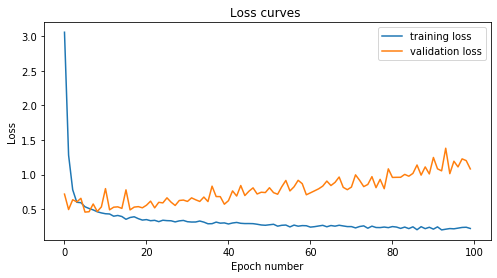

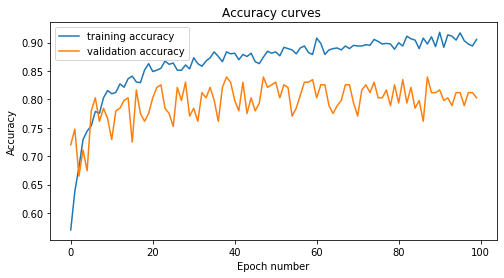

In [19]:
epoch = 100

#loss
plt.figure(figsize=(8,4))
plt.plot([i for i in range(epoch)], model.history.history['loss'], label='training loss')
plt.plot([i for i in range(epoch)], model.history.history['val_loss'], label='validation loss')
plt.title('Loss curves ')
plt.xlabel('Epoch number')
plt.ylabel('Loss')
plt.legend()
plt.show()

#accuracy
plt.figure(figsize=(8,4))
plt.plot([i for i in range(epoch)], model.history.history['acc'], label='training accuracy')
plt.plot([i for i in range(epoch)], model.history.history['val_acc'], label='validation accuracy')
plt.title('Accuracy curves ')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
#get all team data
def build_2020_pred(playoff_teams, team_abr):
  year_team_and_opponent_df = pd.DataFrame()
  year_team_and_opponent_dat = []
  # builds the x input
  for file in os.listdir("/content/drive/My Drive/NBA Predictions/NBA Year Data/" + str(2019) + '-' + str(2020)):
    if file.find('team_and_opponent') != -1:
      file_dat = []
      temp_df = pd.read_csv("/content/drive/My Drive/NBA Predictions/NBA Year Data/" + str(2019) + '-' + str(2020) + '/'+ file)
      temp_df = temp_df.drop(temp_df.columns[0], axis = 1)
      temp_df.drop([0, 4], axis = 0, inplace=True)
      temp_df.drop([temp_df.columns[0], 'G'], axis = 1, inplace=True)
      # temp_df = temp_df.drop(temp_df.columns[0], axis = 1)
      # temp_df.drop([0], axis = 0, inplace=True)
      for col in temp_df.columns:
        temp_df[col] = temp_df[col].astype(str)
        temp_df[col] = temp_df[col].map(lambda x: x.rstrip('%'))
        temp_df[col] = temp_df[col].astype(np.float64)
        for i in range(len(temp_df[col])):
          if np.isnan(temp_df[col].iloc[i]):
            temp_df[col].iloc[i] = 0.0
            # print(temp_df[col].iloc[i])
      team = str(file[0:3])
      print(team, temp_df)
      if temp_df.values.flatten().shape[0] == 132:
        file_dat.append(temp_df)
        file_dat.append(team)
      year_team_and_opponent_dat.append(file_dat)
  return np.array(year_team_and_opponent_dat)

In [21]:
stats_2020 = [] 
stats_2020.append(build_2020_pred(playoff_teams, team_abr))

ATL       MP    FG   FGA     FG%    3P   3PA  ...   AST   STL   BLK   TOV    PF    PTS
1  242.3  40.2  88.6   0.453  10.0  32.2  ...  23.3   8.8   4.9  17.7  22.8  108.0
2   15.0  18.0  17.0  16.000  27.0  17.0  ...  20.0   3.0  17.0  29.0  24.0   21.0
3    0.1  -2.9  -3.4   0.003 -22.8 -13.0  ...  -9.9   6.6  -3.9   3.8  -3.3   -4.7
5  242.3  41.9  88.8   0.472  12.8  34.8  ...  24.3   9.0   7.5  16.8  21.6  117.8
6   15.0  22.0  14.0  25.000  22.0  22.0  ...  18.0  30.0  30.0   3.0  11.0   28.0
7    0.1  -2.0  -1.9  -0.001   3.8   1.2  ...  -9.4  -8.4  38.1  11.8  -2.4   -1.3

[6 rows x 22 columns]
CLE       MP    FG   FGA     FG%    3P   3PA  ...   AST   STL   BLK   TOV    PF    PTS
1  240.0  37.8  87.5   0.432  10.7  32.0  ...  20.4   7.3   3.2  15.4  17.9  102.9
2   22.0  29.0  21.0  28.000  21.0  18.0  ...  28.0  22.0  30.0  16.0   1.0   29.0
3   -0.4  -2.8  -0.1  -0.012   3.9   9.9  ...  -1.4  11.7  33.8  13.9 -10.8   -1.5
5  240.0  43.7  89.5   0.488  12.1  32.3  ...  26.4   8.

In [0]:
test_dat = []
test_teams = [] #match predictions to team in future
for k in range(len(stats_2020[0])):
  test_dat.append(stats_2020[0][k][0].values.flatten().tolist())
  test_teams.append(stats_2020[0][k][1])
test_dat = np.array(test_dat)
test_teams = np.array(test_teams)

In [0]:
#predict the results
pred_2020_results = model.predict(test_dat, batch_size=1)

In [24]:
print(list(zip(pred_2020_results,test_teams)))

[(array([3.4661018e-05], dtype=float32), 'ATL'), (array([6.784082e-07], dtype=float32), 'CLE'), (array([0.9773841], dtype=float32), 'BOS'), (array([0.00434612], dtype=float32), 'WAS'), (array([1.], dtype=float32), 'LAL'), (array([0.9800092], dtype=float32), 'MEM'), (array([0.99961853], dtype=float32), 'PHI'), (array([0.5602348], dtype=float32), 'NOP'), (array([0.00069778], dtype=float32), 'CHO'), (array([0.9978399], dtype=float32), 'DAL'), (array([0.9846976], dtype=float32), 'BRK'), (array([0.8924768], dtype=float32), 'DEN'), (array([0.9999993], dtype=float32), 'MIA'), (array([0.01694359], dtype=float32), 'CHI'), (array([0.9494434], dtype=float32), 'PHO'), (array([0.99999475], dtype=float32), 'DET'), (array([0.9989293], dtype=float32), 'MIL'), (array([0.5610785], dtype=float32), 'MIN'), (array([0.0844142], dtype=float32), 'POR'), (array([0.9780027], dtype=float32), 'GSW'), (array([0.9996917], dtype=float32), 'SAC'), (array([0.01047465], dtype=float32), 'NYK'), (array([0.70700294], dtyp

In [0]:
teams_west = ['DAL', 'DEN', 'GSW', 'HOU', 'LAC', 'LAL', 'MEM', 'MIN', 'NOP', 'OKC', 'PHO', 'POR', 'SAC', 'SAS', 'UTA']
teams_east = ['ATL', 'BOS', 'BRK', 'CHI', 'CHO', 'CLE', 'DET', 'IND', 'MIA', 'MIL', 'NYK', 'ORL', 'PHI', 'TOR', 'WAS' ]

In [0]:
# find the probabilities
def find_proba(teams, pred_2020_results,test_teams):
  probs_dist = []
  for team in teams:
    for probs in list(zip(pred_2020_results,test_teams)):
      if probs[1] == team:
        temp = []
        if float(probs[0][0]) < 0.0001:
          temp.append(0.0001)
        else:
          temp.append(float(probs[0][0]))
        temp.append(probs[1])
        probs_dist.append(temp)
  probs_dist = np.array(probs_dist)
  probs_dist = probs_dist[probs_dist[:,0].argsort()]
  probs_dist = np.flip(probs_dist,axis = 0)
  return probs_dist

In [0]:
probs_west = find_proba(teams_west,pred_2020_results,test_teams)
probs_east = find_proba(teams_east,pred_2020_results,test_teams)

In [28]:
probs_east[:,0]

array(['0.9999992847442627', '0.9999947547912598', '0.9999256134033203',
       '0.9996185302734375', '0.9994568228721619', '0.9989293217658997',
       '0.9846975803375244', '0.977384090423584', '0.9622670412063599',
       '0.016943585127592087', '0.010474649257957935',
       '0.004346119239926338', '0.0006977763841859996', '0.0001',
       '0.0001'], dtype='<U32')

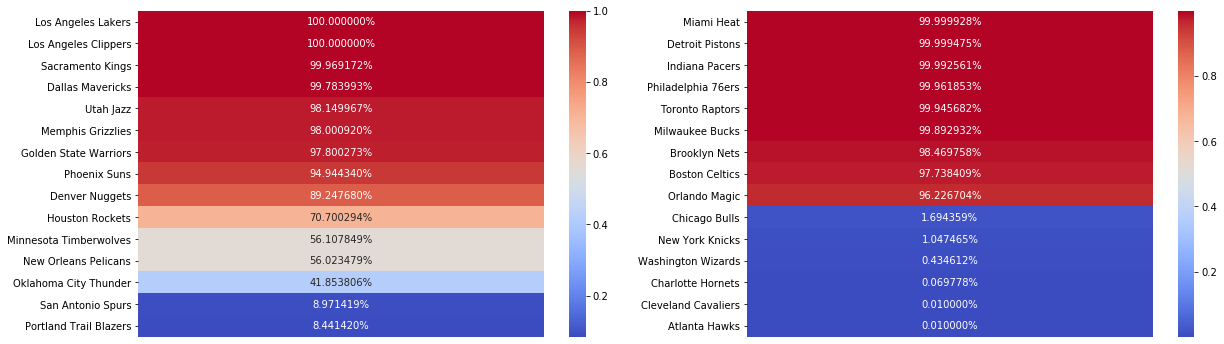

In [29]:
fig, (ax1, ax2) =plt.subplots(1,2,figsize=(20,6))
sns.heatmap(probs_west[:,0].astype(np.double).reshape(15,1), cmap='coolwarm', annot = True, xticklabels=False, yticklabels=[team_abr[i] for i in probs_west[:,1]], fmt=".6%", ax=ax1)
sns.heatmap(probs_east[:,0].astype(np.double).reshape(15,1), cmap='coolwarm', annot = True, xticklabels=False, yticklabels=[team_abr[i] for i in probs_east[:,1]], fmt=".6%", ax=ax2)

### Run multiple simulations

In [0]:
def simulate(iterations):
  total_train_loss = []
  total_train_acc = []
  total_val_loss = []
  total_val_acc = []
  total_probs_west = []
  total_probs_east = []

  for i in range(iterations):
    if i == 0:
      start = time.time()
    print('iteration: ', i)
    # define the keras model
    model = Sequential()
    model.add(Dense(50, input_dim=132, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    #define loss function and compile model
    opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
    model.compile(loss='binary_crossentropy',
                  optimizer='RMSprop',
                  metrics=['accuracy'])
    
    #build train and val data
    train_dat_temp = team_stats
    train_dat = []
    labels = []
    for j in range(len(train_dat_temp)):
      for k in range(len(train_dat_temp[j][0])):
        train_dat.append(train_dat_temp[j][0][k][0].values.flatten().tolist())
        labels.append(train_dat_temp[j][0][k][1])
    train_dat = np.array(train_dat)
    labels = np.array(labels)
 
    #train the model
    model.fit(train_dat, labels, epochs=50, batch_size=20, validation_split = 0.2, shuffle=True, verbose= 0)
    train_loss = model.history.history['loss']
    train_acc = model.history.history['acc']
    val_loss = model.history.history['val_loss']
    val_acc = model.history.history['val_acc']
    total_train_loss.append(train_loss)
    total_train_acc.append(train_acc)
    total_val_loss.append(val_loss)
    total_val_acc.append(val_acc)

    #predict results
    test_dat = []
    test_teams = [] #match predictions to team in list
    for k in range(len(stats_2020[0])):
      test_dat.append(stats_2020[0][k][0].values.flatten().tolist())
      test_teams.append(stats_2020[0][k][1])
    test_dat = np.array(test_dat)
    test_teams = np.array(test_teams)
    pred_2020_results = model.predict(test_dat, batch_size=1)
    probs_west = find_proba(teams_west,pred_2020_results,test_teams)
    probs_east = find_proba(teams_east,pred_2020_results,test_teams)
    total_probs_west.append(probs_west)
    total_probs_east.append(probs_east)

    keras.backend.clear_session()
    if i % 10 == 0 and i != 0:
      end = time.time()
      print('iteration:', str(i-10), 'to' , str(i), 'took ', str(end - start), 'seconds')
      start = time.time()

  return  np.array(total_train_loss), np.array(total_train_acc), np.array(total_val_loss), np.array(total_val_acc), np.array(total_probs_west), np.array(total_probs_east)

In [31]:
#due to variability, simulate many times 
iterations  = 1000
total_train_loss, total_train_acc, total_val_loss, total_val_acc, total_probs_west, total_probs_east = simulate(iterations)

iteration:  0
iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9
iteration:  10
iteration: 0 to 10 took  47.08308219909668 seconds
iteration:  11
iteration:  12
iteration:  13
iteration:  14
iteration:  15


KeyboardInterrupt: ignored

In [0]:
#save the arrays
np.save("/content/drive/My Drive/NBA Predictions/Model/total_train_loss", total_train_loss)
np.save("/content/drive/My Drive/NBA Predictions/Model/total_train_acc", total_train_acc)
np.save("/content/drive/My Drive/NBA Predictions/Model/total_val_loss", total_val_loss)
np.save("/content/drive/My Drive/NBA Predictions/Model/total_val_acc", total_val_acc)
np.save("/content/drive/My Drive/NBA Predictions/Model/total_probs_west", total_probs_west)
np.save("/content/drive/My Drive/NBA Predictions/Model/total_probs_east", total_probs_east)

In [0]:
# load the data
total_train_loss = np.load("/content/drive/My Drive/NBA Predictions/Model/total_train_loss.npy")
total_train_acc = np.load("/content/drive/My Drive/NBA Predictions/Model/total_train_acc.npy")
total_val_loss = np.load("/content/drive/My Drive/NBA Predictions/Model/total_val_loss.npy")
total_val_acc = np.load("/content/drive/My Drive/NBA Predictions/Model/total_val_acc.npy")
total_probs_west = np.load("/content/drive/My Drive/NBA Predictions/Model/total_probs_west.npy")
total_probs_east = np.load("/content/drive/My Drive/NBA Predictions/Model/total_probs_east.npy")

In [0]:
print(total_train_loss.shape)
print(total_train_acc.shape)

print(total_val_loss.shape)
print(total_val_acc.shape)

In [0]:
avg_train_loss = np.mean(total_train_loss,axis = 0)
avg_train_acc = np.mean(total_train_acc,axis = 0)
avg_val_loss = np.mean(total_val_loss,axis = 0)
avg_val_acc = np.mean(total_val_acc,axis = 0)

In [0]:
epoch = 50

#loss
plt.figure(figsize=(8,4))
plt.plot([i for i in range(epoch)], avg_train_loss, label='training loss')
plt.plot([i for i in range(epoch)], avg_val_loss, label='validation loss')
title = 'Loss curves for ' + str(iterations) + ' simulations'
plt.title(title)
plt.xlabel('Epoch number')
plt.ylabel('Loss')
plt.legend()
plt.show()

#accuracy
plt.figure(figsize=(8,4))
plt.plot([i for i in range(epoch)], avg_train_acc, label='training accuracy')
plt.plot([i for i in range(epoch)], avg_val_acc, label='validation accuracy')
title = 'Accuracy curves for ' + str(iterations) + ' simulations'
plt.title(title)
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
def build_avg_probs(total_team_probs, teams_list):
  avg_probs = {}
  for i in teams_list:
    avg_probs[i] = []
    for j in total_team_probs:
      for k in j:
        if k[1] == i: #same team
          avg_probs[i].append(float(k[0]))

  for team in avg_probs.keys():
    avg_probs[team] = statistics.mean(avg_probs[team])
  return avg_probs


In [0]:
avg_probs_west = build_avg_probs(total_probs_west, teams_west)
avg_probs_east = build_avg_probs(total_probs_east, teams_east)

print(avg_probs_west)
avg_probs_west = np.array(list(avg_probs_west.items()))
avg_probs_west = avg_probs_west[avg_probs_west[:,1].argsort()]
avg_probs_west = np.flip(avg_probs_west,axis = 0)
print(avg_probs_west)

print(avg_probs_east)
avg_probs_east = np.array(list(avg_probs_east.items()))
avg_probs_east = avg_probs_east[avg_probs_east[:,1].argsort()]
avg_probs_east = np.flip(avg_probs_east,axis = 0)
print(avg_probs_east)

In [0]:
#note: the labels and values have been swapped, now index 1 corresponds to values and index 0 corresponds to labels
fig, (ax1, ax2) =plt.subplots(1,2,figsize=(20,8),)
title = 'Predicted probabilities for teams making the playoffs in the 2019 to 2020 season in ' + str(iterations) + ' simulations'
fig.suptitle(title)
ax1.title.set_text('West Teams')
sns.heatmap(avg_probs_west[:,1].astype(np.double).reshape(15,1), vmin=0, vmax=1, cmap='coolwarm', annot = True, xticklabels=False, yticklabels=[team_abr[i] for i in avg_probs_west[:,0]], fmt=".6%", ax=ax1)
ax2.title.set_text('East Teams')
sns.heatmap(avg_probs_east[:,1].astype(np.double).reshape(15,1), vmin=0, vmax=1, cmap='coolwarm', annot = True, xticklabels=False, yticklabels=[team_abr[i] for i in avg_probs_east[:,0]], fmt=".6%", ax=ax2)
plt.show()

In [0]:
#get all team data
def build_fake_stats(file_name):
  year_team_and_opponent_df = pd.DataFrame()
  year_team_and_opponent_dat = []
  # builds the x input
  for file in os.listdir("/content/drive/My Drive/NBA Predictions/Fake Data/"):
    #print(file)
      if file.find(file_name) != -1:
        print(file)
        file_dat = []
        temp_df = pd.read_csv("/content/drive/My Drive/NBA Predictions/Fake Data/" + file_name + '.csv')
        temp_df = temp_df.drop(temp_df.columns[0], axis = 1)
        temp_df.drop([0, 4], axis = 0, inplace=True)
        temp_df.drop([temp_df.columns[0], 'G'], axis = 1, inplace=True)
        for col in temp_df.columns:
          temp_df[col] = temp_df[col].astype(str)
          temp_df[col] = temp_df[col].map(lambda x: x.rstrip('%'))
          temp_df[col] = temp_df[col].astype(np.float64)
          for i in range(len(temp_df[col])):
            if np.isnan(temp_df[col].iloc[i]):
              temp_df[col].iloc[i] = 0.0
              # print(temp_df[col].iloc[i])
        team = str(file[0:3])
        print(temp_df.values.flatten().shape[0])
        if temp_df.values.flatten().shape[0] == 132:
          year_team_and_opponent_dat = temp_df
  return np.array(year_team_and_opponent_dat)

In [35]:
test_1 = np.array(build_fake_stats('FakeData1').flatten()).reshape(1,132)

FakeData1.csv
132


In [36]:
test_2 = np.array(build_fake_stats('FakeData2').flatten()).reshape(1,132)

FakeData2.csv
132


In [0]:
def pred_fake(fake_dat):
  total = []
  for i in range (10):
    print('iteration', i)
    #rebuild the model
    model = Sequential()
    model.add(Dense(50, input_dim=132, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    #define loss function and compile model
    opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
    model.compile(loss='binary_crossentropy',
                  optimizer='RMSprop',
                  metrics=['accuracy'])
    model.fit(train_dat, labels, epochs=50, batch_size=20, validation_split = 0.2, shuffle=True, verbose= 0)
    pred = model.predict(fake_dat, batch_size=1)
    total.append(pred[0][0])
  return np.mean(total)


In [38]:
# Memphis 12/10/2019
pred_fake(test_1) 

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9


0.2313993

In [39]:
# Memphis ~12/6/2019
pred_fake(test_2)

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9


0.9048791